In [ ]:
import pandas as pd
from scipy import stats
import altair as alt
import seaborn as sns

In [ ]:
cluster_df = pd.read_csv('/work/output/ca_unsupervised_min_max.csv')
cluster_df = cluster_df[['COUNTYFP','STATEFP','kmeans_pca_cluster']]

ca_df = pd.read_csv('/work/cleaned-csvs/ca_counties_full_dataset.csv')
ca_df=ca_df[ca_df['year']==2018]
cluster_df.head()

,COUNTYFP,STATEFP,kmeans_pca_cluster
0,91,6,1
1,67,6,0
2,83,6,2
3,9,6,1
4,111,6,2


In [ ]:
df = pd.merge(cluster_df,ca_df,left_on=['COUNTYFP','STATEFP'], right_on=['county','state'])

Statistical significance? After performing a PCA analysis to reduce our 70+ variables to two, Kim performed a k-means clustering and found three distinct (and interesting) clusters. We’d like to examine the features of these clusters and Kim already analyzed them with a biplot. I also just calculated the mean for each cluster for the top 10 most variable features in our pca. A screenshot of some is attached.

We're curious if these are statistically significantly different. We'd like to run a two-tailed t-test to compare the distributions for these 10 features. For example, we could compare the distribution of perc. over 65 for cluster one against the total distribution of percent over 65 for both cluster 0 and 2. 

If a t-test were appropriate, we would set alpha = 0.05/30. Since we’re making multiple comparisons (30), it seemed logical that the Bonferroni correction could apply here. I know this increases the possibility of type II error and is often considered too conservative. 

We ultimately didn't include this in the report because likely the t-test assumptions fail to hold, but with more time we'd explore bootstrapping to try to answer similar questions.


In [ ]:

df_0=df[df['kmeans_pca_cluster']==0]
df_1=df[df['kmeans_pca_cluster']==1]
df_2=df[df['kmeans_pca_cluster']==2]


In [ ]:
col = ['perc_65_over', 'perc_white', 'perc_hispanic','perc_poverty','per_capita_num_vehicle_theft',
'coastal_flag','median_home_value','median_income','democrat_pct','median_rent']

# median_home_value             0.234739
# median_income                 0.226722
# democrat_pct                  0.224378
# median_rent                   0.221641
# american_independent_pct      0.213186
# republican_pct                0.211032
# educational_attainment        0.209305
# perc_asian                    0.194298
# per_capita_personal_income 
for num in range(0,3):
    df_not = df[df['kmeans_pca_cluster']!=num]
    df_num=df[df['kmeans_pca_cluster']==num]
    for val in col:
        print(num)
        print(val)    
        t_value,p_value=stats.ttest_ind(df_num[val],df_not[val])

        print('Test statistic is %f'%float("{:.6f}".format(t_value)))

        print('p-value for two tailed test is %f'%p_value)

        alpha = 0.05/30

        if p_value<=alpha:

            print('Conclusion','n','Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0 at %.2f level of significance.'''%alpha)

        else:

            print('Conclusion','n','Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0.''')


0
perc_65_over
Test statistic is -5.552221
p-value for two tailed test is 0.000001
Conclusion n Since p-value(=0.000001) < alpha(=0.00) We reject the null hypothesis H0 at 0.00 level of significance.
0
perc_white
Test statistic is -5.339776
p-value for two tailed test is 0.000002
Conclusion n Since p-value(=0.000002) < alpha(=0.00) We reject the null hypothesis H0 at 0.00 level of significance.
0
perc_hispanic
Test statistic is 6.587511
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.00) We reject the null hypothesis H0 at 0.00 level of significance.
0
perc_poverty
Test statistic is 4.359990
p-value for two tailed test is 0.000056
Conclusion n Since p-value(=0.000056) < alpha(=0.00) We reject the null hypothesis H0 at 0.00 level of significance.
0
per_capita_num_vehicle_theft
Test statistic is 3.234259
p-value for two tailed test is 0.002048
Conclusion n Since p-value(=0.002048) > alpha(=0.00) We do not reject the null hypothesis H0.
0
coastal_f

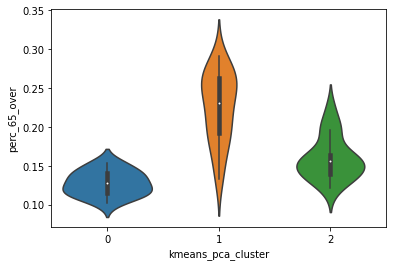

In [ ]:

ax = sns.violinplot(x='kmeans_pca_cluster', y='perc_65_over', data=df)

In [ ]:
df['kmeans_pca_cluster'] =df['kmeans_pca_cluster'].apply(str)

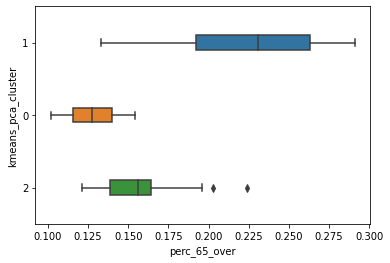

In [ ]:

ax = sns.boxplot(y='kmeans_pca_cluster', x='perc_65_over', data=df, width=0.2,orient='horiz')


<AxesSubplot:xlabel='median_home_value', ylabel='kmeans_pca_cluster'>

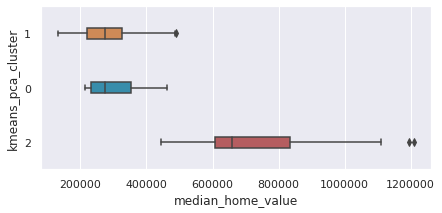

In [ ]:
my_pal = {"0": '#2596be', "1": "#e28743", "2":"r"}

def box_plot1(category):
    sns.set(rc={'figure.figsize':(7,3)})
    ax = sns.boxplot(y='kmeans_pca_cluster', x=category, data=df, width=0.2,orient='horiz',
    palette=my_pal)
    ax.ticklabel_format(style='plain', axis='x')
    return ax

box_plot1('median_home_value')


<AxesSubplot:xlabel='perc_65_over', ylabel='kmeans_pca_cluster'>

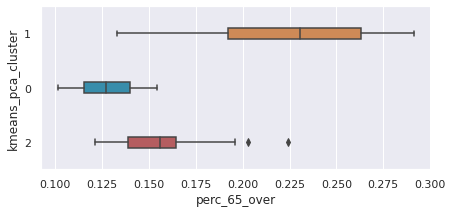

In [ ]:
box_plot1('perc_65_over')

In [ ]:
col.append('kmeans_pca_cluster')


In [ ]:

df_stats = df[col].groupby('kmeans_pca_cluster').mean(col)
pd.options.display.float_format = "{:,.2f}".format

df_stats

,perc_65_over,perc_white,perc_hispanic,perc_poverty,per_capita_num_vehicle_theft,coastal_flag,median_home_value,median_income,democrat_pct,median_rent
kmeans_pca_cluster,,,,,,,,,,
0,0.13,0.36,0.49,0.17,0.00,0.00,"294,311.76","57,718.47",36.35,"1,053.76"
1,0.23,0.74,0.15,0.14,0.00,0.13,"287,321.74","55,548.87",31.06,"1,000.52"
2,0.16,0.44,0.33,0.10,0.00,1.00,"750,772.22","92,003.00",46.74,"1,772.67"


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f6c76417-5fde-42f3-8920-755838dec3fa' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>